## Introduction
This project is about the classification of cardiologist. we create the model for detect the patient has a ischemic disease or not. 

## Loading data

### importing basic librairies

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### reading the dataset

In [29]:
df = pd.read_csv('heart.csv')
df.head()
v = df.shape[1]-1
print("Number of data points in dataset: %d" % df.shape[0])
print("Number of features in datset: %d" % v)

Number of data points in dataset: 303
Number of features in datset: 13


The data set contains following features:
<br> 1.age: the age of the person in years
<br> 2.sex: female or male
<br> 3.cp: chest pain,modalities (asymptomatic(0), atypical chest pain(1), typical chest doubler(2), other pain(3))
<br> 4.trestbps: arterial pressure at the clinical exam 
<br> 5.chol: blood cholesterol value (blood test)
<br> 6.fbs: gycemieajeun(normal or anormal)
<br> 7.restecg: EGC(normal or anormal)
<br> 8.thalach: maximum heart rate on the exam
<br> 9.exang: PainEffort: 0 (no) if the patient does not feel pain on exertion, 1 (yes) otherwise.
<br> 10.oldpeak: numeric value quantifying a sign at the ECG
<br> 11.slope: sign at the ECG taking 3 modalities: 0, 1 or 2
<br> 12.ca:Visible vessels: number of large blood vessels visible on a radiological examination
<br> 13.thal:
<br> 14.target: target classes

## Data Cleaning 

from the description dataset, there is no nan in dataset.  

In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


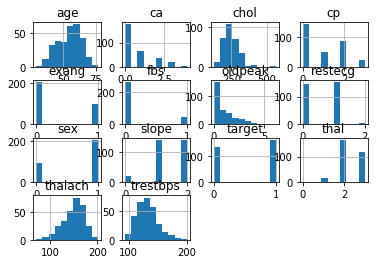

In [61]:
df.hist();

verify the features(threstbps,chol,thalach,oldpeaks)outlier using boxplot and  using the value percentile to remove the outlier data

Text(0.5,0.98,'Visualization outliers in dataset')

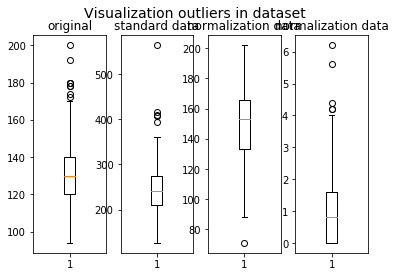

In [48]:
fig, axs = plt.subplots(1, 4)
axs[0].boxplot(df.loc[:,'trestbps'])
axs[0].set_title('trestbps')

axs[1].boxplot(df.loc[:,'chol'])
axs[1].set_title('chol')

axs[2].boxplot(df.loc[:,'thalach'])
axs[2].set_title('thalach')

axs[3].boxplot(df.loc[:,'oldpeak'])
axs[3].set_title('oldpeak')

fig.suptitle('Visualization outliers in dataset', fontsize=14)

In [64]:
fea = df.loc[:,['trestbps','chol','thalach','oldpeak']]
Q1_Q3 = fea.quantile([0.25,0.75]).as_matrix()
Q1 = Q1_Q3[0]
Q3 = Q1_Q3[1]

IQR = Q3 - Q1
outlier_Q1 = Q1 - 1.5*IQR
outlier_Q3 = Q3 + 1.5*IQR

#outlier for 4 index 
outlier = (fea['trestbps']<outlier_Q1[0])|(fea['trestbps']>outlier_Q3[0])|(fea['chol']>outlier_Q3[1])|(fea['chol']<outlier_Q1[1])|(fea['thalach']<outlier_Q1[2])|(fea['thalach']>outlier_Q3[2])|(fea['oldpeak']<outlier_Q1[3])|(fea['oldpeak']>outlier_Q3[3])
outlier_index = df[outlier].index

In [65]:
df_drop = df
df_drop = df_drop.drop(outlier_index,axis=0)

## Dataset spliting
The most machine learning classification algorithms are sensitive to unbalance in the predictor classes. It's better verifiy if it has the problem of imbalance dataset or not. 

In [66]:
X, y = df_drop.drop('target',1),df_drop[['target']]

In [67]:
count_target = df.groupby(['target']).size()
print("Counts of label '1' in original dataset : %d" % count_target[1])
print("Counts of label '0' in original dataset: %d" % count_target[0])

Counts of label '1' in original dataset : 165
Counts of label '0' in original dataset: 138


In the target classes, we can oberseve the raton 1 and 0 is 165 and 138. there is no probleme of the balance so we don't need to balanced dataset. 

we split the dataset into two sets, one for training and the other for testing;
we have split the dataset in a 70–30 ratio.

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227, 13)
Number transactions y_train dataset:  (227, 1)
Number transactions X_test dataset:  (57, 13)
Number transactions y_test dataset:  (57, 1)


## Rescaling dataset 

In [171]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import label_binarize

#ss = StandardScaler()
#mytrain = X_train;
#X_train = pd.DataFrame(ss.fit_transform(mytrain))
#X_train.columns = mytrain.columns#先拟合数据在进行标准化
#X_train = mytrain

## Basic EDA

## Feature Selecting

### by coefficient correlations
The correlation matrix permet us to observe the relationship among the features.
We generate the first correlation heat-map for the balanced data. 

In [172]:
corr = X_train.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1,-0.079,-0.08,0.28,0.16,0.099,-0.065,-0.38,0.05,0.2,-0.097,0.31,0.039
sex,-0.079,1,-0.11,-0.0052,-0.16,0.047,-0.12,-0.035,0.18,0.14,-0.032,0.15,0.26
cp,-0.08,-0.11,1,0.073,-0.1,0.079,0.081,0.29,-0.4,-0.11,0.12,-0.12,-0.19
trestbps,0.28,-0.0052,0.073,1,0.16,0.056,-0.11,-0.023,0.02,0.19,-0.06,0.087,-0.048
chol,0.16,-0.16,-0.1,0.16,1,0.0034,-0.19,0.03,0.022,-0.032,0.059,0.078,-0.011
fbs,0.099,0.047,0.079,0.056,0.0034,1,-0.049,-0.028,0.016,0.017,-0.074,0.15,-0.056
restecg,-0.065,-0.12,0.081,-0.11,-0.19,-0.049,1,0.06,-0.12,-0.1,0.11,-0.065,0.0075
thalach,-0.38,-0.035,0.29,-0.023,0.03,-0.028,0.06,1,-0.38,-0.34,0.35,-0.19,-0.08
exang,0.05,0.18,-0.4,0.02,0.022,0.016,-0.12,-0.38,1,0.29,-0.27,0.12,0.17
oldpeak,0.2,0.14,-0.11,0.19,-0.032,0.017,-0.1,-0.34,0.29,1,-0.54,0.16,0.16


### by PCA

In [173]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train)

### by RandomizedLogisticRegression

In [174]:
from sklearn.linear_model import RandomizedLogisticRegression
rlasso_balanced_data = RandomizedLogisticRegression(C=1,random_state=41)
rlasso_balanced_data.fit(X_train, np.ravel(y_train))
m0=sorted(zip(map(lambda x: round(x, 8), rlasso_balanced_data.scores_),X_train.columns), reverse=True)
m0=pd.DataFrame(m0)
print(m0)

        0         1
0   0.630     exang
1   0.595        ca
2   0.560   thalach
3   0.545        cp
4   0.525   oldpeak
5   0.470      thal
6   0.455       sex
7   0.315     slope
8   0.095       age
9   0.070   restecg
10  0.020  trestbps
11  0.000       fbs
12  0.000      chol


In [175]:
n0=m0[m0[0]>0.1]
n0_blanced_data=list(n0[1]) 
print('Number of features from original dataset：',len(X_train.columns))
print('Features selected：',len(n0))
n0_blanced_data

Number of features from original dataset： 13
Features selected： 8


['exang', 'ca', 'thalach', 'cp', 'oldpeak', 'thal', 'sex', 'slope']

## Model

### random forest
- feature selected by LogisticRegression

- feature selected by pca

### logistic regression 

在分类情形下，经过学习后的LR分类器是一组权值w0,w1,w2...wn，当测试样本的数据输入时，这组权值与测试数据按

照线性加和得到 x = x0+w1x1+w2x2+w3x3+...wnxn，这里是每个样本的个特征。

按照sigmoid函数的形式求出 ，其中sigmoid函数的定义域为，值域为，因此最基本的LR分类器适合对两类目标进行分类。

所以Logistic回归最关键的问题就是研究如何求得这组权值。这个问题是用极大似然估计来做的。
https://blog.csdn.net/loveliuzz/article/details/78708359

The score with different features 

In [176]:
from sklearn.linear_model import LogisticRegression
p=0
for i in range(3,len(n0_blanced_data)+1):
    s0 = n0_blanced_data[0:i]
    model_RL = LogisticRegression(C=1e5)
    model_RL.fit(X_train[s0],np.ravel(y_train))
    predict_y = model_RL.predict(X_test[s0])
    p += np.mean(predict_y==y_test['target'])
    print('The score of model regression logistic for training ',i,' features: ',model_RL.score(X_test[s0],y_test))


The score of model regression logistic for training  3  features:  0.7543859649122807
The score of model regression logistic for training  4  features:  0.7894736842105263
The score of model regression logistic for training  5  features:  0.8245614035087719
The score of model regression logistic for training  6  features:  0.8771929824561403
The score of model regression logistic for training  7  features:  0.8421052631578947
The score of model regression logistic for training  8  features:  0.8596491228070176
select features for model is ['exang', 'ca', 'thalach', 'cp', 'oldpeak', 'thal', 'sex']


In [177]:

n0_use = n0_blanced_data[:6]
print('select features for model is',n0_use)

select features for model is ['exang', 'ca', 'thalach', 'cp', 'oldpeak', 'thal']


### Evaluate the model of data with ROC curve

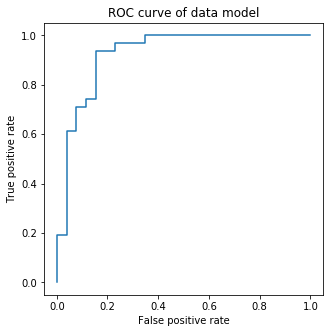

0.924317617866005


In [178]:
from sklearn.metrics import roc_curve


model_RL = LogisticRegression(C=1e5)
model_RL.fit(X_train[n0_use],np.ravel(y_train))
predict_prob_RL = model_RL.predict_proba(X_test[n0_use])
 
fpr,tpr,threshold = roc_curve(y_test,predict_prob_RL[:,1])
 
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of data model')
plt.show()
 
#roc cure
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,predict_prob_RL[:,1])
print(score)

In [179]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve#, roc_curve, auc 

answer = predict_prob_RL[:,1]  
precision, recall, thresholds = precision_recall_curve(y_test, answer)      
report = answer > 0.5  
print(classification_report(y_test, report, target_names = ['neg', 'pos']))  
print("average precision:", p/100)  


              precision    recall  f1-score   support

         neg       0.88      0.85      0.86        26
         pos       0.88      0.90      0.89        31

   micro avg       0.88      0.88      0.88        57
   macro avg       0.88      0.87      0.88        57
weighted avg       0.88      0.88      0.88        57

average precision: 0.049473684210526316


Text(0.5,1,'classification')

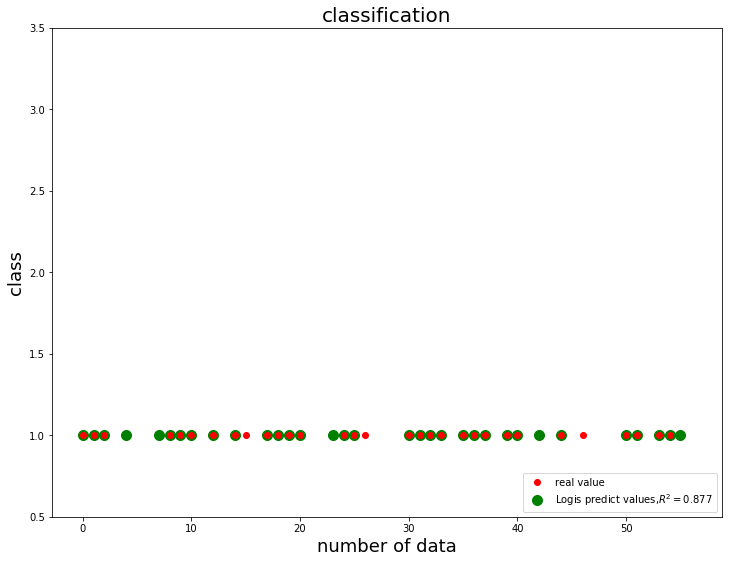

In [180]:
len_x_test = range(len(X_test))
plt.figure(figsize=(12,9),facecolor="w")
plt.ylim(0.5,3.5)
plt.plot(len_x_test,y_test,"ro",markersize=6,zorder=3,label=u"real value")
plt.plot(len_x_test,predict_y,"go",markersize=10,zorder=2,label=u"Logis predict values,$R^2=%.3f$" %model_RL.score(X_test[n0_use],y_test) )
plt.legend(loc = 'lower right')
plt.xlabel(u'number of data', fontsize=18)
plt.ylabel(u'class', fontsize=18)
plt.title(u'classification', fontsize=20)

